---
title: "Cyclistic Company - Case Study"
author: "Nitant Sharma"
date: "7/23/2021"
---

## Introduction

Cyclistic is a bike-share company in Chicago.The director of marketing believes the company’s future success depends on maximizing the number of annual memberships.

Therefore, the team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve the recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## Business Task 

To analyze user behaviours on how annual members and casual riders use Cyclistic bikes differently to make recommendations on how to convert casual riders into annual members.

## Data Set Collection and limitation 

* The dataset used by me is the 1 month dataset from 202104-divvy-tripdata.zip taken from <https://divvy-tripdata.s3.amazonaws.com/index.html> made publicly available by Motivate International Inc. 

* The dataset does not contains any information related to transactions done by the users due to data privacy issues because of which we won't be able to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

### Packages used

* The packages which were used are tidyverse(),lubridate(),dplyr() and ggplot2().

* The data set was loaded using following command

In [1]:
library(tidyverse)
library(lubridate)
library(scales)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
april_2021_trip_data = read.csv("../input/202104divvytripdata/202104-divvy-tripdata.csv",sep=",")

## Data Processing

* For processing the data we start by summarizing it by using the following command.

In [3]:
summary(april_2021_trip_data)

   ride_id          rideable_type       started_at          ended_at        
 Length:337230      Length:337230      Length:337230      Length:337230     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:337230      Length:337230      Length:337230      Length:337230     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

* Then we **clean** our data by performing operations such as checking the NA values and removing them and checking the pressence of any duplicate data inside our dataset by following commands

In [4]:
table(is.na(april_2021_trip_data))


  FALSE    TRUE 
4383456     534 

In [5]:
cleaned_data<-na.omit(april_2021_trip_data)

In [6]:
table(is.na(cleaned_data))


  FALSE 
4380519 

In [7]:
sum(duplicated(cleaned_data))

[1] 0

* Now I have added two **columns** to our dataset for performing data analysis.

* ride_length - To compute how long it took for the cyclist to complete the trip from start to end station in secs.

* day_of_week - Which day of the week the trip took place (ie. 1 - Sunday and 7 - Saturday)

In [8]:
new_april_2021_trip_data <- cleaned_data

new_april_2021_trip_data$ride_length <- difftime(new_april_2021_trip_data$ended_at,new_april_2021_trip_data$started_at)

new_april_2021_trip_data$ride_length <- as.numeric(as.character(new_april_2021_trip_data$ride_length))

print("Ride Length Sample Data")
head(new_april_2021_trip_data$ride_length)

new_april_2021_trip_data$day_of_week <- wday(new_april_2021_trip_data$started_at,week_start=1)

print("Day of Week Sample Data")
head(new_april_2021_trip_data$day_of_week)

[1] "Ride Length Sample Data"


[1]   1879   3858 341859   1506   5477     41

[1] "Day of Week Sample Data"


[1] 1 2 6 6 6 7

* Again summarizing the data to see whether the two columns have been added or not.

In [9]:
summary(new_april_2021_trip_data)

   ride_id          rideable_type       started_at          ended_at        
 Length:336963      Length:336963      Length:336963      Length:336963     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:336963      Length:336963      Length:336963      Length:336963     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

# Data Analysis

### Analysis of stations with highest footfall of trips.

In [10]:
head(count(filter(new_april_2021_trip_data,start_station_name==end_station_name),start_station_name,end_station_name,member_casual),10)

head(count(filter(new_april_2021_trip_data,start_station_name!=end_station_name),start_station_name,member_casual),10)

,start_station_name,end_station_name,member_casual,n
,<chr>,<chr>,<chr>,<int>
1,,,casual,6246
2,,,member,8961
3,2112 W Peterson Ave,2112 W Peterson Ave,member,4
4,63rd St Beach,63rd St Beach,casual,82
5,63rd St Beach,63rd St Beach,member,10
6,900 W Harrison St,900 W Harrison St,casual,23
7,900 W Harrison St,900 W Harrison St,member,16
8,Aberdeen St & Jackson Blvd,Aberdeen St & Jackson Blvd,casual,22
9,Aberdeen St & Jackson Blvd,Aberdeen St & Jackson Blvd,member,33


,start_station_name,member_casual,n
,<chr>,<chr>,<int>
1,,casual,4174
2,,member,6675
3,2112 W Peterson Ave,casual,16
4,2112 W Peterson Ave,member,47
5,63rd St Beach,casual,51
6,63rd St Beach,member,65
7,900 W Harrison St,casual,117
8,900 W Harrison St,member,267
9,Aberdeen St & Jackson Blvd,casual,165


### Analysis of blank stations.

In [11]:
head(count(filter(new_april_2021_trip_data,start_station_name==""),start_station_name,rideable_type,member_casual),10)

,start_station_name,rideable_type,member_casual,n
,<chr>,<chr>,<chr>,<int>
1,,electric_bike,casual,10420
2,,electric_bike,member,15636


### Average distance covered by different types of bikes.

In [12]:
aggregate(new_april_2021_trip_data$ride_length~new_april_2021_trip_data$rideable_type,FUN = mean)

new_april_2021_trip_data$rideable_type,new_april_2021_trip_data$ride_length
<chr>,<dbl>
classic_bike,1158.295
docked_bike,5012.767
electric_bike,1035.704


### Average duration of different types of members

In [13]:
new_april_2021_trip_data %>%  
  group_by(member_casual) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) 


member_casual,number_of_rides,average_duration
<chr>,<int>,<dbl>
casual,136414,2196.4948
member,200549,867.2602


# Data Visualization

## 1. Type of bikes usage by riders in a week 

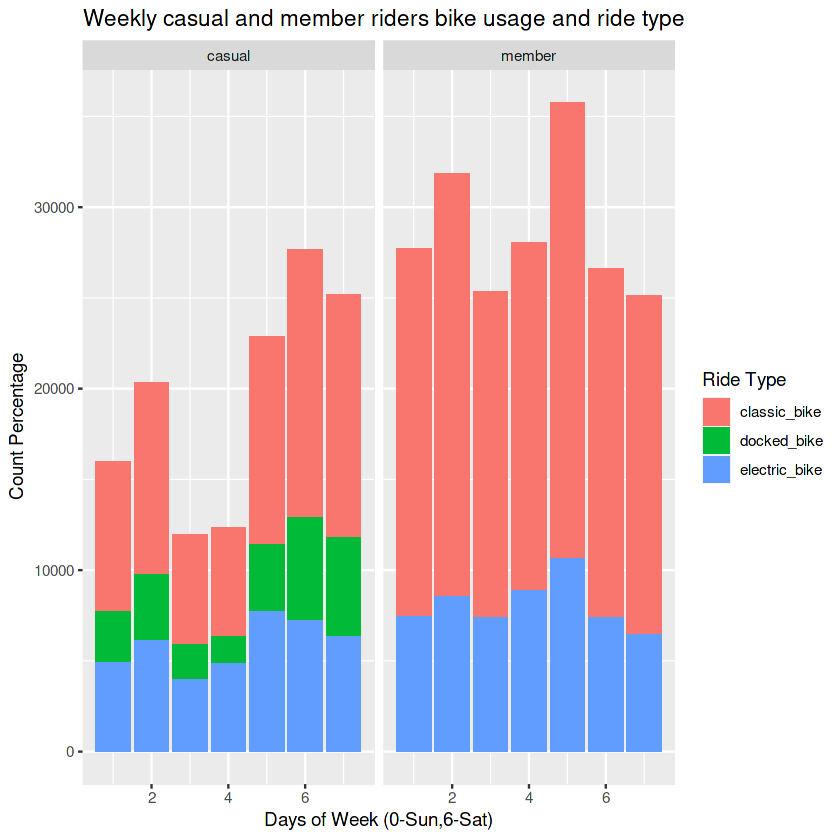

In [14]:
plot1<-ggplot(data=new_april_2021_trip_data,aes(x=day_of_week,fill=rideable_type))+geom_bar()+labs(x="Days of Week (0-Sun,6-Sat)",y="Count Percentage",fill="Ride Type")+facet_grid(.~member_casual)

print(plot1+ggtitle("Weekly casual and member riders bike usage and ride type"))

## 2. Type of members using different types of bike in a week

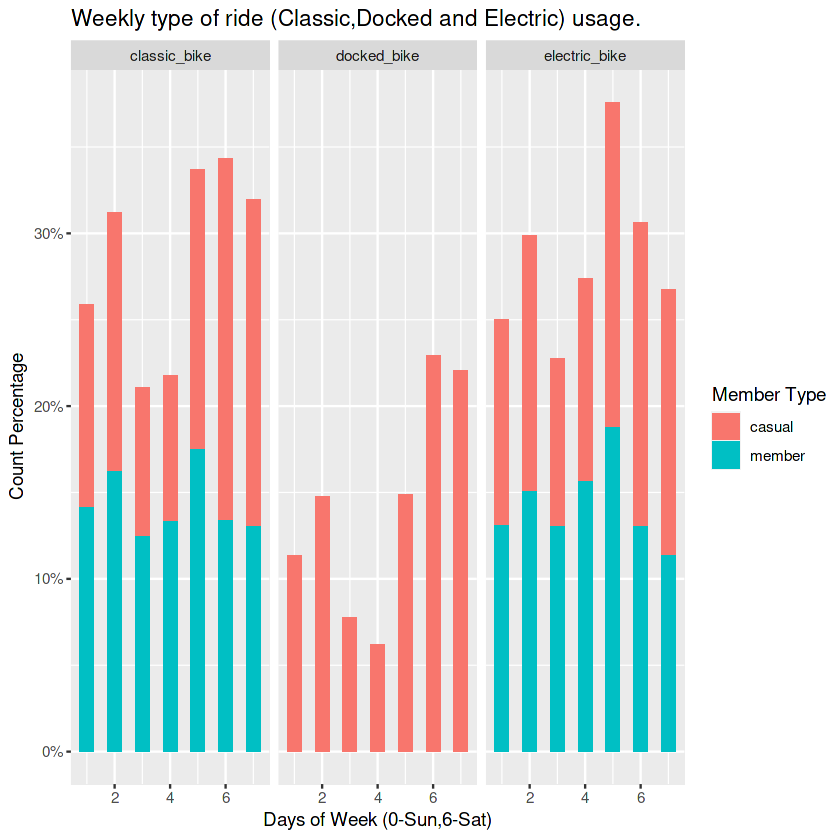

In [15]:
plot2<-ggplot(new_april_2021_trip_data,aes(x=day_of_week,y = ..prop..,fill=member_casual))+geom_bar(width=0.5)+scale_y_continuous(labels = scales::percent)+labs(x="Days of Week (0-Sun,6-Sat)",y="Count Percentage",fill="Member Type")+facet_grid(.~rideable_type)

print(plot2+ggtitle(label = "Weekly type of ride (Classic,Docked and Electric) usage."))

## 3. Bike utilization on each day of the week by different member types

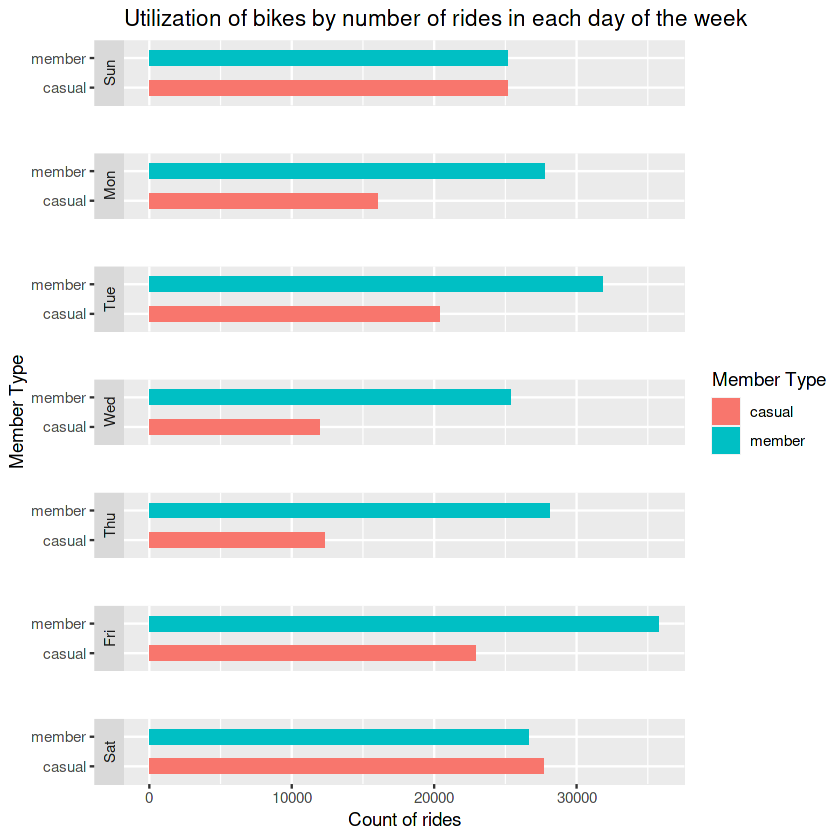

In [16]:
new_april_2021_trip_data$day_of_week_names<-wday(new_april_2021_trip_data$started_at,label=TRUE)

plot3<-ggplot(new_april_2021_trip_data,aes(x=member_casual,fill=member_casual))+geom_bar(width=0.5)+labs(x="Member Type",y="Count of rides",fill="Member Type")+facet_grid(day_of_week_names~.,switch = "y", scales = "free", space = "free")+theme(panel.spacing = unit(2, "lines"))+ coord_flip()

print(plot3+ggtitle(label="Utilization of bikes by number of rides in each day of the week"))

## Key Findings and Insights

1. Average ride length of a trip is 1405 secs.
2. 2112 W Peterson Ave station has least number of rides.
3. There are 10420 casual and 15636 member, NULL station names and are using electric bikes.
4. Docked bikes covered maximum distance and electric bikes least.
5. Member type riders have done more rides then casual type rider but for a shorter distance.
6. Classic bikes are the most preferred bike by member and casual riders in a week.
7. Member riders have never used docked bike in a week.
8. Member riders have taken maximum rides on Tues and Fri whereas Classic riders have taken most rides on Fri and Sat.


## Recommendation

1. Digital marketing team needs to target stations such as 2112 W Peterson Ave station and others for better reach of the product.
2. Technical team can perform testing on electric bikes and improve the synchronization with the app to avoid technical glicthes like blank station names etc.
3. A special plan can be introduced for Casual type riders by giving offers like Free trial if registered for Membership for certain Kms and as they prefer the bikes for longer rides then they can be given extra discount on the total amount being charged.
4. A dedicated support team can be step up for customers who opt for electric bikes as their ride to attract more users towards electric bikes.
5. Advance booking feature can be introduced for membership customers on Peak days such as Tues,Fri and Sat to avoid last minute challenge of finding the bike at the prefered spot.